# Explore Party Manifestos

In [9]:
!pip install wordcloud

  Using cached wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (547 kB)


In [2]:
import pandas as pd

In [3]:
manifesto_df = pd.read_csv("../data/german_manifestos.csv")

In [4]:
manifesto_df

,partyID,party,year,manifest_text,manifest_tokens
0,41113,90/Greens,2017,"A. EINLEITUNG Liebe Bürgerinnen und Bürger,am ...","[{'text': 'A. EINLEITUNG', 'cmp_code': 'H', 'e..."
1,41113,90/Greens,2021,"Eine Einladung Liebe Wähler*innen, durch Wahle...","[{'text': 'Eine Einladung', 'cmp_code': 'H', '..."
2,41223,LINKE,2017,"Die Zukunft, für die wir kämpfen: SOZIAL. GERE...","[{'text': 'Die Zukunft, für die wir kämpfen: S..."
3,41223,LINKE,2021,Einführung Es kommt auf uns alle an. Es kommt ...,"[{'text': 'Einführung', 'cmp_code': 'H', 'eu_c..."
4,41320,SPD,2017,Es ist Zeit für mehr Gerechtigkeit! 2017 ist e...,[{'text': 'Es ist Zeit für mehr Gerechtigkeit!...
5,41320,SPD,2021,1.0.Zukunft. Respekt. Europa. Am Anfang des dr...,"[{'text': '1.0.Zukunft.', 'cmp_code': 'H', 'eu..."
6,41420,FDP,2017,Schauen wir nicht länger zu! Wir sehen die Her...,"[{'text': 'Schauen wir nicht länger zu!', 'cmp..."
7,41420,FDP,2021,Das Programm der Freien Demokraten zur Bundest...,[{'text': 'Das Programm der Freien Demokraten ...
8,41521,CDU/CSU,2017,Ein gutes Land in dieser Zeit Deutschland ist ...,"[{'text': 'Ein gutes Land in dieser Zeit', 'cm..."
9,41521,CDU/CSU,2021,Einleitung Deutschland ist ein starkes Land. D...,"[{'text': 'Einleitung', 'cmp_code': 'H', 'eu_c..."


In [5]:
import string
# defining normalization of text: converting to lowercase and removing punctuation
def normalize_text(input_str:str):
    return input_str.lower().translate(str.maketrans('','', string.punctuation))


In [6]:
# normalize (remove punctuation, to lower)
manifesto_df['normalized'] = manifesto_df['manifest_text'].apply(normalize_text)
# Tokenized speech
manifesto_df['tokenized'] = manifesto_df['normalized'].str.split()
# length of speech
manifesto_df['speech_length'] = manifesto_df['tokenized'].apply(len)
# vocab of a speech
manifesto_df['vocab'] = manifesto_df['tokenized'].apply(lambda x: set(x))
# vocab size per speech
manifesto_df['vocab_size'] = manifesto_df['vocab'].apply(lambda x: len(x))
# remove stop words
with open("german_stopwords_full.txt", "r", encoding="utf-8") as g:
    german_stopwords_full = [line.strip() for line in g if not line.lstrip().startswith(";")]
print(german_stopwords_full)
manifesto_df['clean_full'] = manifesto_df['tokenized'].apply(lambda tokens: [word for word in tokens if word not in german_stopwords_full and word.isalpha()])


['ab', 'aber', 'abermaliges', 'abermals', 'abgerufen', 'abgerufene', 'abgerufener', 'abgerufenes', 'abgesehen', 'acht', 'aehnlich', 'aehnliche', 'aehnlichem', 'aehnlichen', 'aehnlicher', 'aehnliches', 'aehnlichste', 'aehnlichstem', 'aehnlichsten', 'aehnlichster', 'aehnlichstes', 'aeusserst', 'aeusserste', 'aeusserstem', 'aeussersten', 'aeusserster', 'aeusserstes', 'ähnlich', 'ähnliche', 'ähnlichem', 'ähnlichen', 'ähnlicher', 'ähnliches', 'ähnlichst', 'ähnlichste', 'ähnlichstem', 'ähnlichsten', 'ähnlichster', 'ähnlichstes', 'alle', 'allein', 'alleine', 'allem', 'allemal', 'allen', 'allenfalls', 'allenthalben', 'aller', 'allerdings', 'allerlei', 'alles', 'allesamt', 'allg', 'allg.', 'allgemein', 'allgemeine', 'allgemeinem', 'allgemeinen', 'allgemeiner', 'allgemeines', 'allgemeinste', 'allgemeinstem', 'allgemeinsten', 'allgemeinster', 'allgemeinstes', 'allmählich', 'allzeit', 'allzu', 'als', 'alsbald', 'also', 'am', 'an', 'and', 'andauernd', 'andauernde', 'andauerndem', 'andauernden', 'an

In [7]:
tokenized = manifesto_df['tokenized'].dropna()

# 1. Total number of speeches
num_speeches = len(tokenized)

# 2. Average speech length (in words)
avg_length = tokenized.apply(len).mean()

# 3. Maximum and minimum speech length
max_length = tokenized.apply(len).max()
min_length = tokenized.apply(len).min()

# 4. Vocabulary size (unique words across all utterances)
all_words = [word for sublist in tokenized for word in sublist]
vocab_size = len(set(all_words))

# 5. Total word count
total_words = len(all_words)

# Show results
print(f"Total number of manifestos: {num_speeches}")
print(f"Average manifesto length (words): {avg_length:.2f}")
print(f"Max manifesto length: {max_length} words")
print(f"Min manifesto length: {min_length} words")
print(f"Total word count: {total_words}")
print(f"Vocabulary size: {vocab_size}")


Total number of manifestos: 12
Average manifesto length (words): 40367.42
Max manifesto length: 68647 words
Min manifesto length: 16056 words
Total word count: 484409
Vocabulary size: 40109


In [8]:
from collections import Counter

# Flatten all tokens into a single list
all_tokens = [token for tokens in manifesto_df['clean_full'] for token in tokens]

# Count word frequencies
word_counts = Counter(all_tokens)

# Get top 10 most common words
top_20 = word_counts.most_common(20)

# Display
for word, count in top_20:
    print(f"{word}: {count}")


menschen: 1698
deutschland: 1282
stärken: 851
unternehmen: 697
schaffen: 686
demokraten: 633
leben: 623
unterstützen: 584
fördern: 582
europäischen: 582
arbeit: 552
europa: 551
gesellschaft: 548
eu: 520
kinder: 511
bildung: 458
frauen: 454
euro: 441
öffentlichen: 438
land: 431


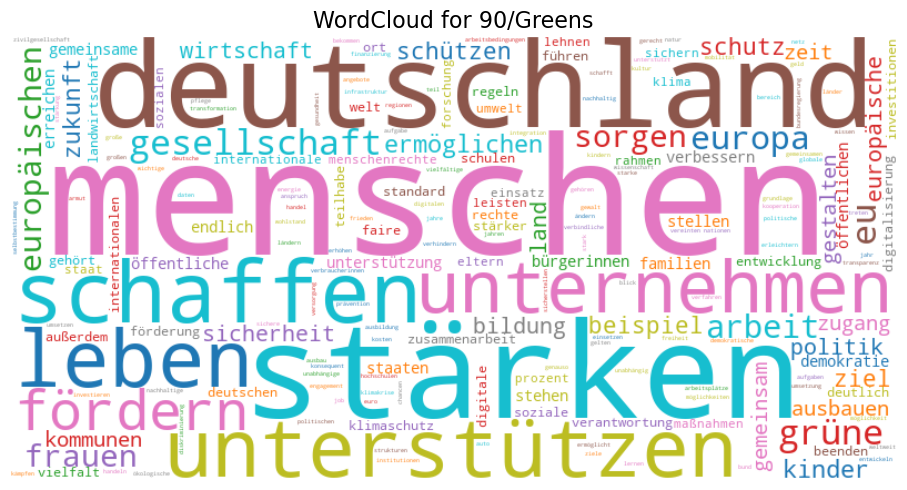

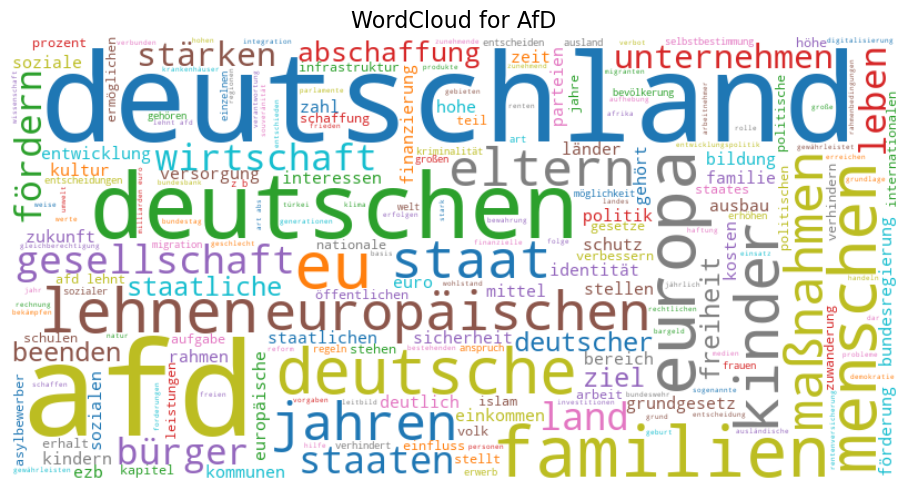

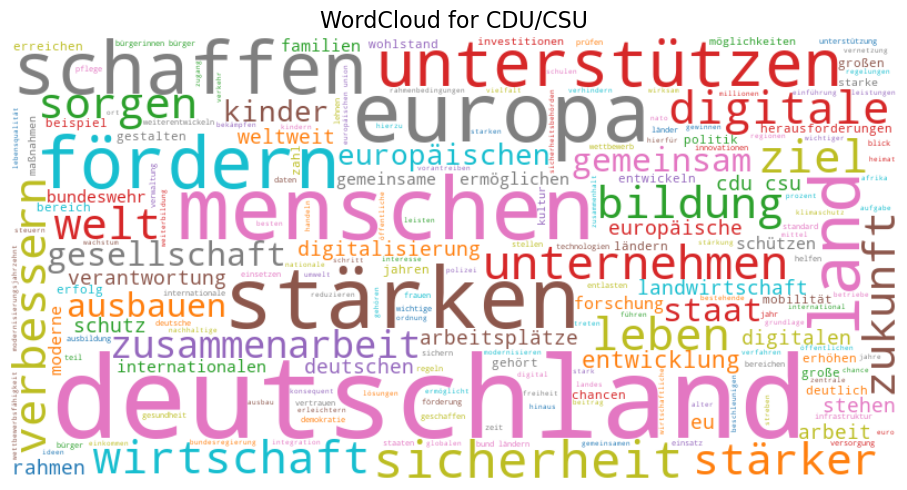

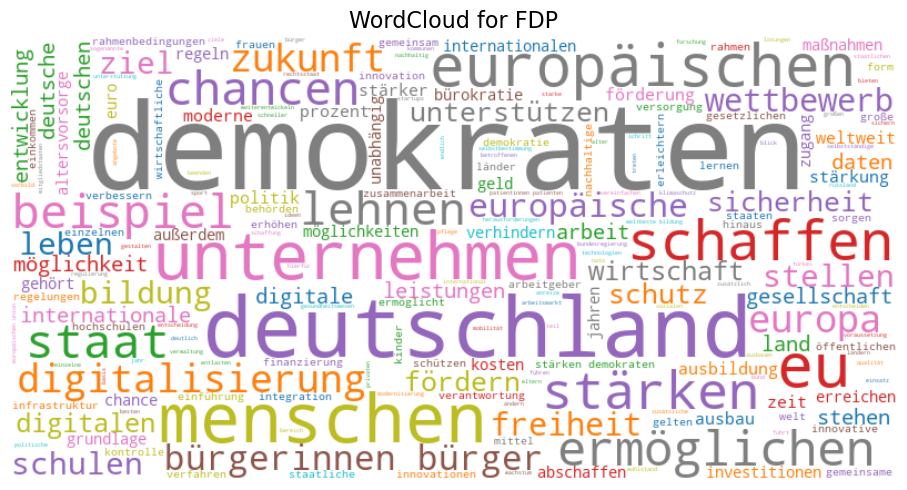

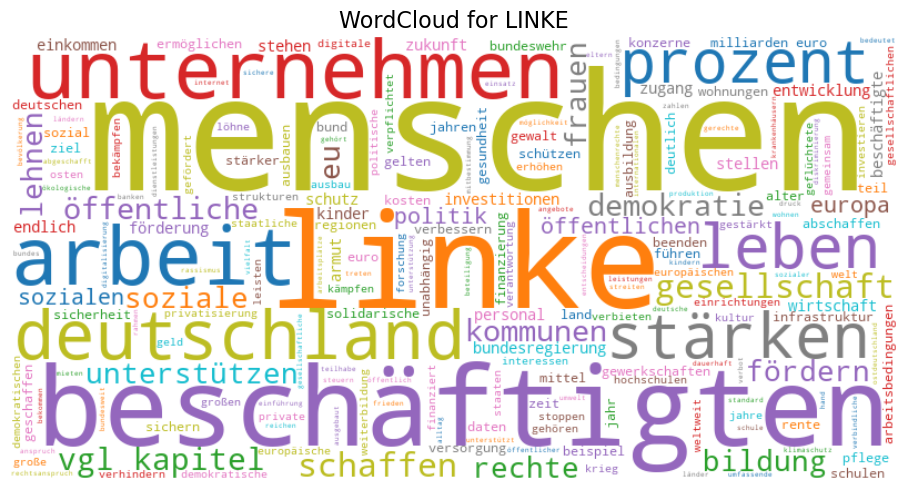

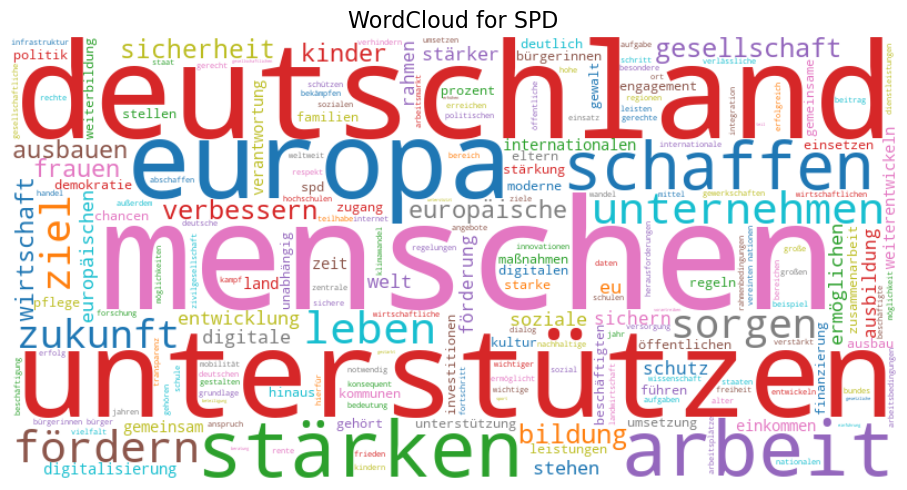

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Group by party and combine all tokens into a single text
party_tokens = manifesto_df.groupby('party')['clean_full'].sum()

# Plot one wordcloud per party
for party, tokens in party_tokens.items():
    # Join tokens into one string
    text = " ".join(tokens)

    # Generate word cloud
    wc = WordCloud(width=800, height=400, background_color='white',
                   colormap='tab10', max_words=200).generate(text)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {party}", fontsize=16)
    plt.tight_layout()
    plt.show()

In [11]:
import ast

manifesto_df['manifest_tokens'] = manifesto_df['manifest_tokens'].apply(ast.literal_eval)
manifesto_df['cmp_codes'] = manifesto_df['manifest_tokens'].apply(lambda x: [item['cmp_code'] for item in x])


In [13]:
mp_v5 = pd.read_csv("../data/codebook_categories_MPDS2020a.csv", dtype={'code':str})

In [14]:
mp_v5_map = {}
for _,row in mp_v5.iterrows():
    mp_v5_map[row['code']] = row['title']

/tmp/ipykernel_2884/537566156.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = subset.groupby(['party', 'cmp_label']).size().unstack(fill_value=0)


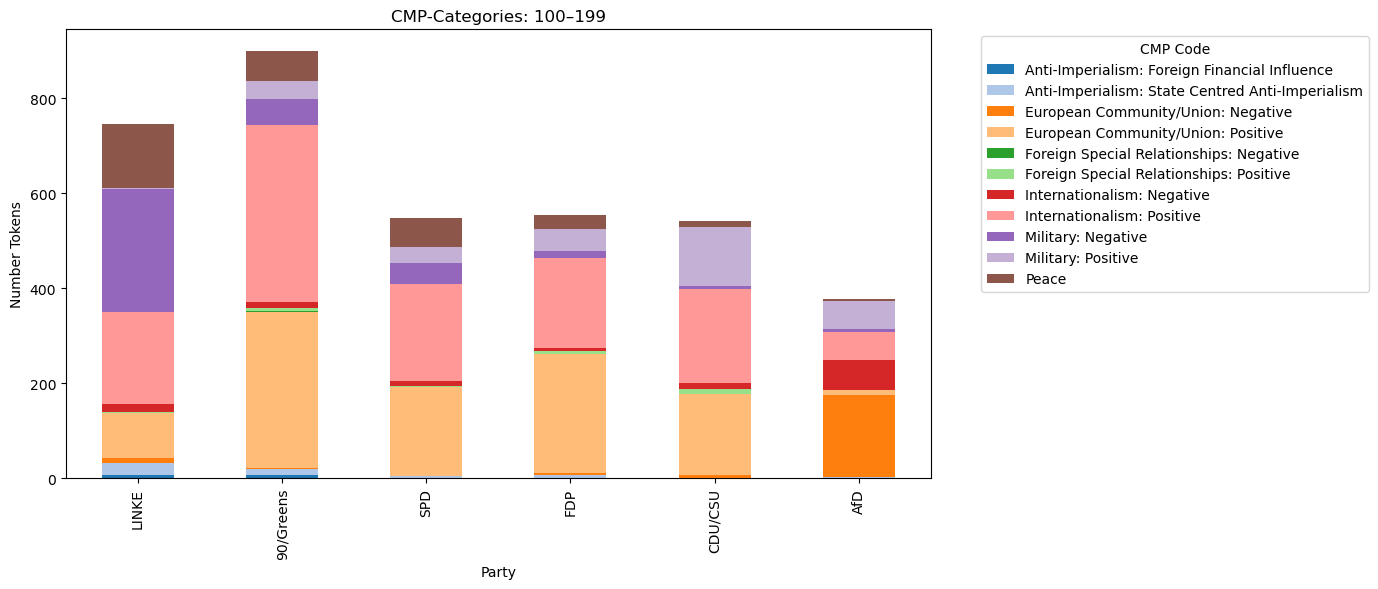

/tmp/ipykernel_2884/537566156.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = subset.groupby(['party', 'cmp_label']).size().unstack(fill_value=0)


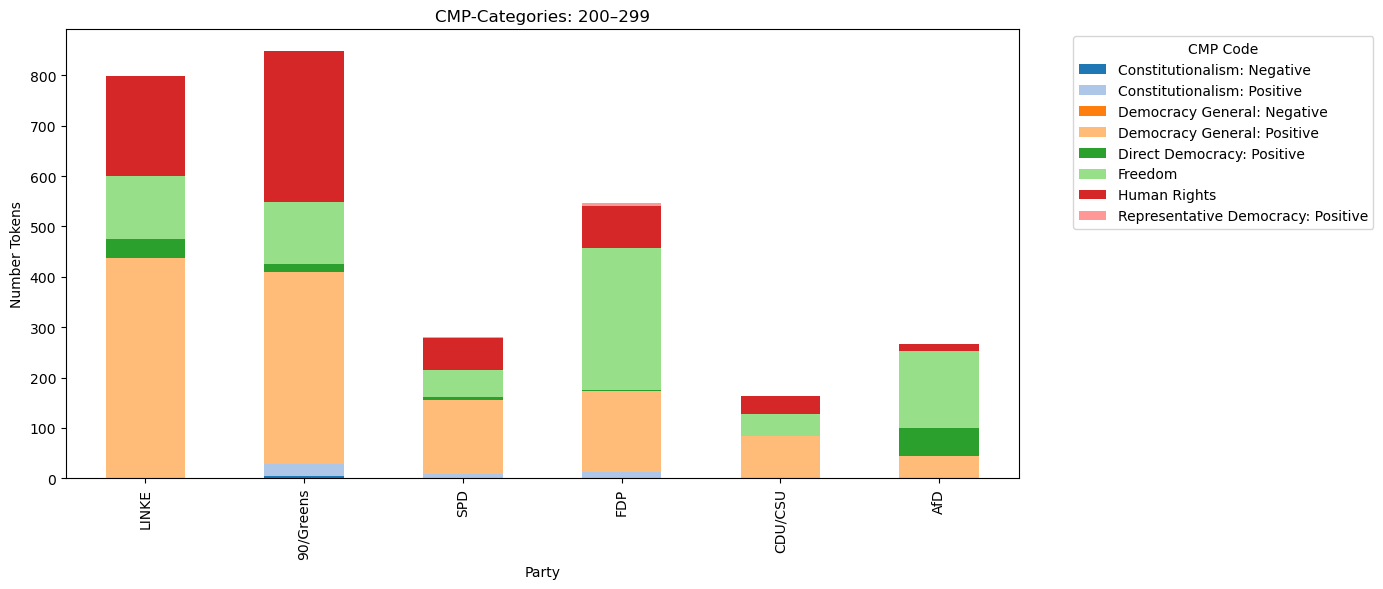

/tmp/ipykernel_2884/537566156.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = subset.groupby(['party', 'cmp_label']).size().unstack(fill_value=0)


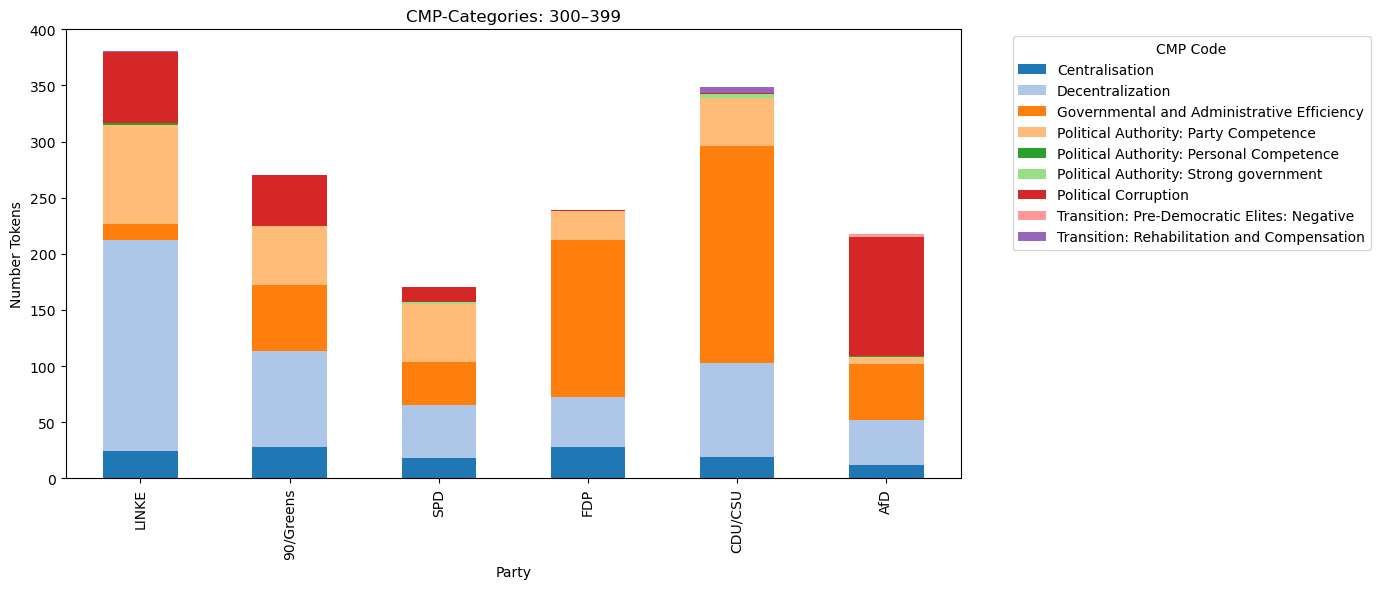

/tmp/ipykernel_2884/537566156.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = subset.groupby(['party', 'cmp_label']).size().unstack(fill_value=0)


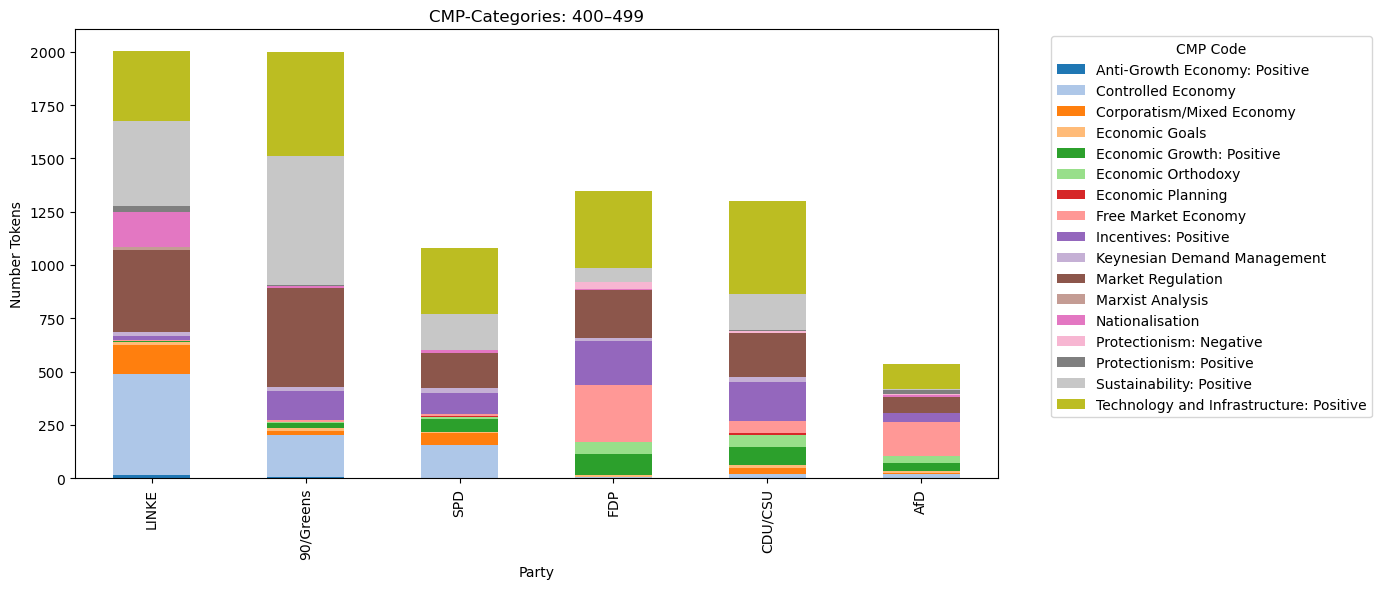

/tmp/ipykernel_2884/537566156.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = subset.groupby(['party', 'cmp_label']).size().unstack(fill_value=0)


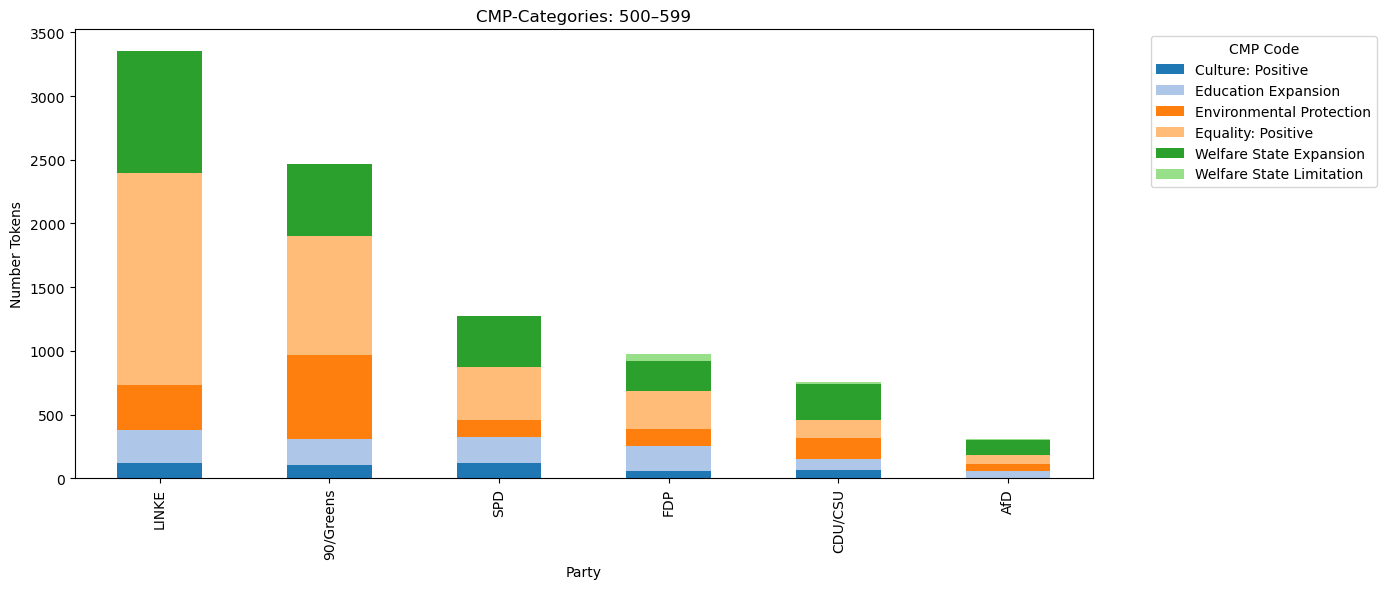

/tmp/ipykernel_2884/537566156.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = subset.groupby(['party', 'cmp_label']).size().unstack(fill_value=0)


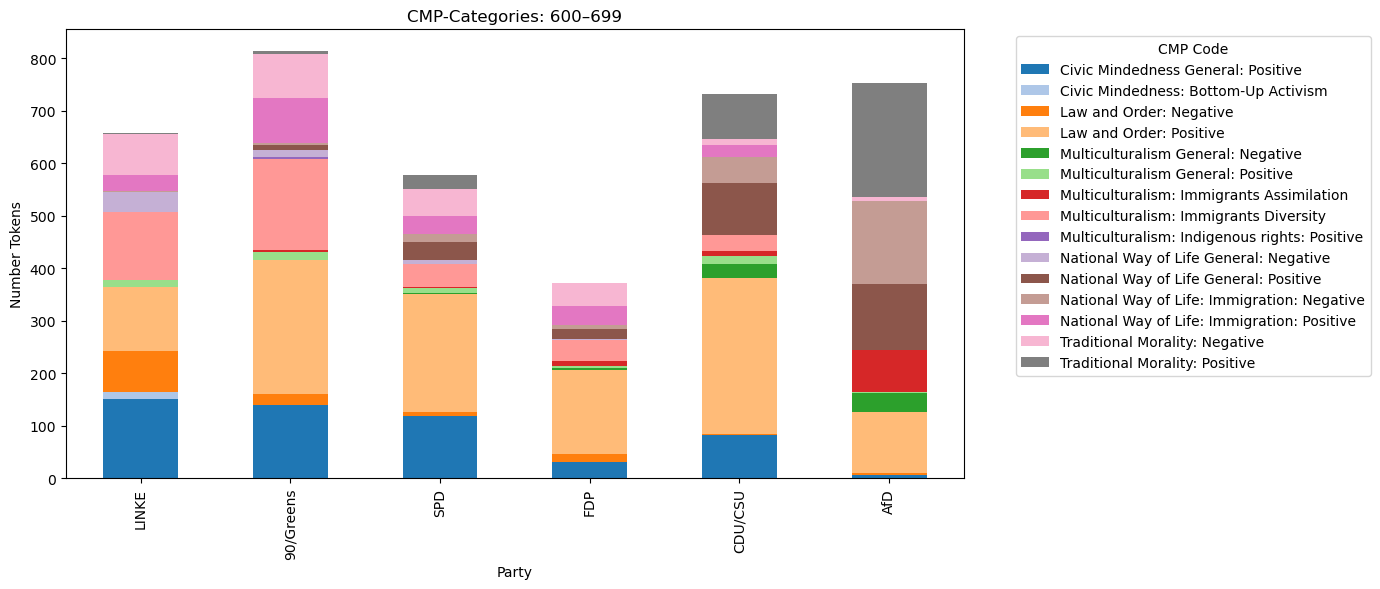

/tmp/ipykernel_2884/537566156.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = subset.groupby(['party', 'cmp_label']).size().unstack(fill_value=0)


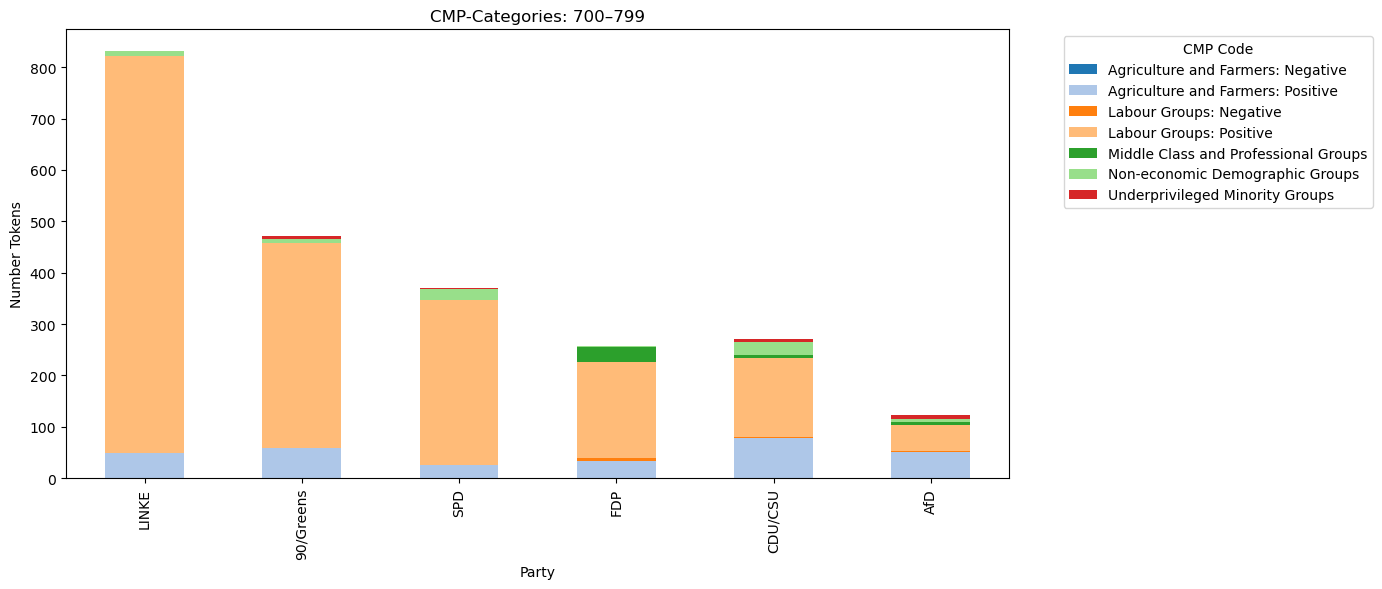

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# remove 000 (no group), map category names
df_exploded = manifesto_df.explode('cmp_codes')
df_exploded = df_exploded[df_exploded['cmp_codes'] != '000']
df_exploded = df_exploded[df_exploded['cmp_codes'].isin(mp_v5_map.keys())]
df_exploded['cmp_label'] = df_exploded['cmp_codes'].map(mp_v5_map)

# part in groups
def extract_group(code_str):
    match = re.match(r'^(\d+)', code_str)
    if match:
        return int(match.group(1)) // 100 * 100
    return None

df_exploded['code_group'] = df_exploded['cmp_codes'].apply(extract_group)

# list of groups
code_groups = sorted(df_exploded['code_group'].dropna().unique())

# colors
palette_base = sns.color_palette("tab20")

# party order
party_order = ['LINKE', '90/Greens', 'SPD', 'FDP', 'CDU/CSU', 'AfD']
df_exploded['party'] = pd.Categorical(df_exploded['party'], categories=party_order, ordered=True)


# plot per group
for group in code_groups:
    subset = df_exploded[df_exploded['code_group'] == group]
    
    # group: party & label
    counts = subset.groupby(['party', 'cmp_label']).size().unstack(fill_value=0)

    if counts.empty:
        continue  

    # dynamic colorpalette
    labels = counts.columns.tolist()
    palette = palette_base[:len(labels)]

    # Plot
    ax = counts.plot(
        kind='bar',
        stacked=True,
        figsize=(14, 6),
        color=palette,
    )

    plt.title(f'CMP-Categories: {group}–{group+99}')
    plt.ylabel('Number Tokens')
    plt.xlabel('Party')
    plt.legend(title='CMP Code', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


***
# Extract Manifesto Parts on Topics 

In [ ]:
!pip install nltk

In [52]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import re
from nltk.tokenize import sent_tokenize
import json

In [110]:
# topics
topics = ["Mindestlohn", "Kosovo", "Pandemiehilfen", "Gaspreise"]

# related keywords
keywords_to_match = {"Mindestlohn" : ["mindestlohn", "mindestvergütung", "lohnerhöhung", "lohngrenze"], #"entgeld", "arbeitslohn",
                    "Kosovo" : ["bundeswehreinsatz", "bundeswehreinsätze" "auslandseinsatz", "auslandseinsätze", "bundeswehr", "militär"],
                    "Pandemiehilfen" : ["wirtschaftshilfen", "wirtschaftshilfe", "wirtschaftsstabilisierungsfonds", "coronahilfen", "pandemiehilfe", "pandemie"],
                    "Gaspreise" : ["gas", "gaspreis", "gaspreise", "energiepreis", "energiepreise", "gasversorgung", "gasmarkt", "energiekrise", "preisdeckel", "gaspreisbremse"]}


In [111]:
dict_to_rename = {"90/Greens" : "GRÜNE", "CDU/CSU" : "Union"}
manifesto_df["party"] = manifesto_df["party"].replace(dict_to_rename)
manifesto_df

,partyID,party,year,manifest_text,manifest_tokens,normalized,tokenized,speech_length,vocab,vocab_size,clean_full
0,41113,GRÜNE,2017,"A. EINLEITUNG Liebe Bürgerinnen und Bürger,am ...","[{'text': 'A. EINLEITUNG', 'cmp_code': 'H', 'e...",a einleitung liebe bürgerinnen und bürgeram 24...,"[a, einleitung, liebe, bürgerinnen, und, bürge...",60406,"{politik, mindestausbildungsvergütung, klasse,...",10361,"[a, einleitung, liebe, bürgerinnen, bürgeram, ..."
1,41113,GRÜNE,2021,"Eine Einladung Liebe Wähler*innen, durch Wahle...","[{'text': 'Eine Einladung', 'cmp_code': 'H', '...",eine einladung liebe wählerinnen durch wahlen ...,"[eine, einladung, liebe, wählerinnen, durch, w...",67589,"{planungsbereich, politik, mindestausbildungsv...",12059,"[einladung, liebe, wählerinnen, wahlen, entsch..."
2,41223,LINKE,2017,"Die Zukunft, für die wir kämpfen: SOZIAL. GERE...","[{'text': 'Die Zukunft, für die wir kämpfen: S...",die zukunft für die wir kämpfen sozial gerecht...,"[die, zukunft, für, die, wir, kämpfen, sozial,...",56110,"{politik, mindestausbildungsvergütung, etappen...",10255,"[zukunft, kämpfen, sozial, gerecht, frieden, e..."
3,41223,LINKE,2021,Einführung Es kommt auf uns alle an. Es kommt ...,"[{'text': 'Einführung', 'cmp_code': 'H', 'eu_c...",einführung es kommt auf uns alle an es kommt a...,"[einführung, es, kommt, auf, uns, alle, an, es...",68647,"{gerechteste, politik, mindestausbildungsvergü...",12300,"[einführung, bundestagswahl, entscheidet, näch..."
4,41320,SPD,2017,Es ist Zeit für mehr Gerechtigkeit! 2017 ist e...,[{'text': 'Es ist Zeit für mehr Gerechtigkeit!...,es ist zeit für mehr gerechtigkeit 2017 ist ei...,"[es, ist, zeit, für, mehr, gerechtigkeit, 2017...",36546,"{politik, mindestausbildungsvergütung, dialogf...",7170,"[zeit, gerechtigkeit, entscheidendes, jahr, sp..."
5,41320,SPD,2021,1.0.Zukunft. Respekt. Europa. Am Anfang des dr...,"[{'text': '1.0.Zukunft.', 'cmp_code': 'H', 'eu...",10zukunft respekt europa am anfang des dritten...,"[10zukunft, respekt, europa, am, anfang, des, ...",23546,"{leitindustrie, politik, mindestausbildungsver...",5731,"[respekt, europa, anfang, dritten, jahrzehnts,..."
6,41420,FDP,2017,Schauen wir nicht länger zu! Wir sehen die Her...,"[{'text': 'Schauen wir nicht länger zu!', 'cmp...",schauen wir nicht länger zu wir sehen die hera...,"[schauen, wir, nicht, länger, zu, wir, sehen, ...",33910,"{unterfinanzierte, politik, klasse, umgang, au...",7375,"[schauen, länger, herausforderungen, welt, ras..."
7,41420,FDP,2021,Das Programm der Freien Demokraten zur Bundest...,[{'text': 'Das Programm der Freien Demokraten ...,das programm der freien demokraten zur bundest...,"[das, programm, der, freien, demokraten, zur, ...",35674,"{daejeon, politik, palästinensische, klasse, u...",7913,"[programm, freien, demokraten, bundestagswahl,..."
8,41521,Union,2017,Ein gutes Land in dieser Zeit Deutschland ist ...,"[{'text': 'Ein gutes Land in dieser Zeit', 'cm...",ein gutes land in dieser zeit deutschland ist ...,"[ein, gutes, land, in, dieser, zeit, deutschla...",19298,"{begonnen, ernährungswirtschaft, politik, über...",4350,"[gutes, land, zeit, deutschland, liebens, lebe..."
9,41521,Union,2021,Einleitung Deutschland ist ein starkes Land. D...,"[{'text': 'Einleitung', 'cmp_code': 'H', 'eu_c...",einleitung deutschland ist ein starkes land da...,"[einleitung, deutschland, ist, ein, starkes, l...",43053,"{politik, etappenziel, klasse, umgang, preisli...",8539,"[einleitung, deutschland, starkes, land, verdi..."


In [112]:
# Group by party and combine all tokens into a single text
party_tokens = manifesto_df.groupby('party')['clean_full'].sum()
party_tokens

party
AfD      [kapitel, verteidigung, demokratie, deutschlan...
FDP      [schauen, länger, herausforderungen, welt, ras...
GRÜNE    [a, einleitung, liebe, bürgerinnen, bürgeram, ...
LINKE    [zukunft, kämpfen, sozial, gerecht, frieden, e...
SPD      [zeit, gerechtigkeit, entscheidendes, jahr, sp...
Union    [gutes, land, zeit, deutschland, liebens, lebe...
Name: clean_full, dtype: object

In [113]:
keyword_count = {}

# Flatten keywords to lookup faster
flat_keywords = {kw: topic for topic, kws in keywords_to_match.items() for kw in kws}

for party, tokens in party_tokens.items():
    # Count all tokens in the current party
    token_counts = Counter(tokens)
    
    # Filter only those that are in our keyword list
    matched_counts = {}
    
    for kw, topic in flat_keywords.items():
        count = token_counts.get(kw, 0)
        if topic in matched_counts:
            matched_counts[topic] += count
        else:
            matched_counts[topic] = count

    keyword_count[party] = matched_counts

keyword_count

{'AfD': {'Mindestlohn': 5, 'Kosovo': 9, 'Pandemiehilfen': 1, 'Gaspreise': 4},
 'FDP': {'Mindestlohn': 6, 'Kosovo': 13, 'Pandemiehilfen': 6, 'Gaspreise': 0},
 'GRÜNE': {'Mindestlohn': 5,
  'Kosovo': 23,
  'Pandemiehilfen': 25,
  'Gaspreise': 11},
 'LINKE': {'Mindestlohn': 26,
  'Kosovo': 91,
  'Pandemiehilfen': 26,
  'Gaspreise': 8},
 'SPD': {'Mindestlohn': 2, 'Kosovo': 13, 'Pandemiehilfen': 8, 'Gaspreise': 1},
 'Union': {'Mindestlohn': 0,
  'Kosovo': 38,
  'Pandemiehilfen': 22,
  'Gaspreise': 1}}

In [114]:
# Prepare a dictionary to store results
party_contexts = {}

# Loop through each party
for party in manifesto_df["party"].unique():
    # 1. Combine both manifesto texts per party
    combined_text = " ".join(manifesto_df[manifesto_df["party"] == party]["manifest_text"].values).lower()
    
    # 2. Tokenize into sentences
    sentences = sent_tokenize(combined_text)
    
    # 3. For each top-level topic, find matching sentence indices
    topic_sentence_indices = {}

    for topic, keyword_list in keywords_to_match.items():
        matched_indices = []
        for i, sentence in enumerate(sentences):
            if any(re.search(rf'\b{kw}\b', sentence) for kw in keyword_list):
                matched_indices.append(i)
        
        # 4. Expand indices to include ±5 sentences
        expanded_indices = set()
        for idx in matched_indices:
            start = max(idx - 3, 0)
            end = min(idx + 4, len(sentences))  # +4 because end is exclusive
            expanded_indices.update(range(start, end))
        
        # 5. Merge overlapping windows by sorting and checking gaps
        sorted_indices = sorted(expanded_indices)
        merged_indices = set()
        if sorted_indices:
            start = sorted_indices[0]
            end = sorted_indices[0]
            for idx in sorted_indices[1:]:
                if idx <= end + 1:
                    end = idx
                else:
                    merged_indices.update(range(start, end + 1))
                    start = idx
                    end = idx
            merged_indices.update(range(start, end + 1))
        else:
            merged_indices = set()

        # 6. Extract final sentences
        final_sentences = [sentences[i] for i in sorted(merged_indices)]
        party_contexts.setdefault(party, {})[topic] = " ".join(final_sentences)
        

#party_contexts

In [115]:
with open("../data/party_manifesto_contexts.json", "w", encoding="utf-8") as f:
    json.dump(party_contexts, f, ensure_ascii=False, indent=2)

In [109]:
party_contexts["Union"]['Pandemie']

'dabei wollen wir das gute besser machen. denn klar ist: wir können nicht zaubern, aber wir können und wir wollen arbeiten und gestalten. wir haben in der unionsgeführten bundesregierung vieles erreicht. unsere politik für wachstum und solide finanzen hat die grundlage dafür geschaffen, dass wir in der pandemie umfassend handeln konnten: zum schutz der bürgerinnen und bürger vor dem virus, für die impfstoffrevolution und umfassende hilfen für betriebe und beschäftigte. das ist nicht selbstverständlich und nicht garantiert. erfolg ist kein schicksal, sondern das ergebnis harter arbeit. unsere richtung ist klar: wir wollen den wandel gestalten, damit deutschland an der spitze bleibt. eine dynamik, die wirtschaft und klimaschutz voranbringt, arbeitsplätze sichert und neue schafft, familien unterstützt und eine moderne arbeitswelt gestaltet. dabei stürmen wir nicht blind ins morgen, sondern halten maß und mitte. das bedeutet auch: wir werden nichts versprechen, was wir nicht einhalten könn